In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data





In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y



In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model



In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))



In [ ]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

Epoch 1/20
187/187 - 1s - loss: 0.1669 - 1s/epoch - 8ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0603 - 295ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0350 - 294ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0187 - 294ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0113 - 289ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0092 - 281ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0083 - 305ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0077 - 287ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0071 - 297ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0069 - 281ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0065 - 288ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0063 - 293ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0058 - 292ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0056 - 286ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0053 - 295ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

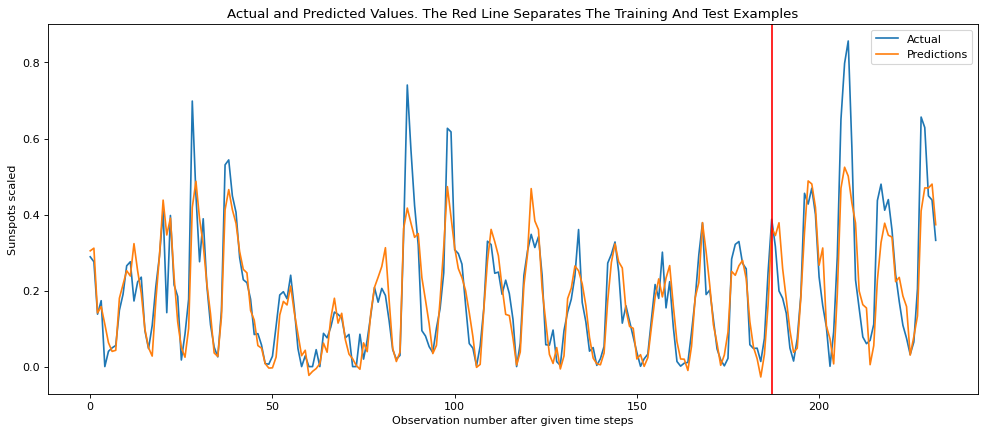

In [ ]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)

IMDB RNN

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import matplotlib.pyplot as plt

In [ ]:
max_word_range = 10000

(input_train, output_train), (input_test, output_test) = imdb.load_data(num_words=max_word_range)

print(len(input_train), 'train sequences.')
print(len(input_test), 'test sequences.')

17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences.
25000 test sequences.


In [ ]:
max_word_amount = 500

input_train = sequence.pad_sequences(input_train, maxlen=max_word_amount)
input_test = sequence.pad_sequences(input_test, maxlen=max_word_amount)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
hidden_units=3
dense_units=1
input_shape=(12,1)

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
model.add(Dense(units=dense_units, activation=activation[1]))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# time_steps = 12
# train_data, test_data, data = get_train_test(sunspots_url)
# trainX, trainY = get_XY(train_data, time_steps)
# testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)